Assignment 1 (Supervised learning, kNN algorithm)

Anniina Mäkinen, Jyri Männikkö, Niina Pietilä

## Part 1

### 1.1 Kaggle datassetti

**Datasetti & kNN soveltuvuus**
- WineQT.csv on otettu Kagglesta - https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?resource=download
- Wine Quality Datasetti sisältää paljon numeraalisia muuttujia (sokerin määrä, alkoholin määrä, ph arvo, yms.) joka on hyvä etu kNN laskiessaan mitkä viinit ovat lähimpänä toisiaan
- Tarkoituksena on testata, voiko datasetissä olevien viinien kemikaalistien ominaisuuksien perusteella ennustaa, mikä viini maistuu hyvältä ja mikä ei
- Y-muuttuja: Quality - kertoo viinin laadun asteikolla 0-10. Tätä halutaan koittaa ennustaa muiden viinin sisältämien ominaisuuksien avulla.
- Scikit-learn = Pythonin koneoppimiskirjasto (malleja, aineiston jako, mittareita).

In [359]:
import pandas as pd

df = pd.read_csv('WineQT.csv')

#X = Viinien ominaisuudet, Y = Viinien laatu
X = df.drop(['quality','Id'], axis=1)
y = df['quality']


print(df.shape)
df.head()

(1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### 1.2  kNN ajaminen


**Koulutetaan normaali kNN-malli (K=5) käyttäen 80/20 jakosuhdetta.**

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 80/20 jako
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# kNN, oletusarvo k=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

len(X_train), len(X_test)

print(f"Mallia opetettiin {len(X_train)} datapisteellä ja suoriutumista arvioitiin {len(X_test)} datapisteen avulla.")
print(f"Näiden yhteenlaskettu summa ({len(X_train) + len(X_test)}) vastaa datasetin havaintojen kokonaismäärää.")


Mallia opetettiin 914 datapisteellä ja suoriutumista arvioitiin 229 datapisteen avulla.
Näiden yhteenlaskettu summa (1143) vastaa datasetin havaintojen kokonaismäärää.


### kNN testaus

**Testataan koulutettu malli ja näytetään tarkkuus**

In [361]:
from sklearn.metrics import accuracy_score

k=5
knn=KNeighborsClassifier(k)
knn.fit(X_train, y_train)
y_pred_sklearn= knn.predict(X_test)
print(y_pred_sklearn)

[5 5 5 6 7 6 5 5 6 5 5 6 5 6 4 5 6 6 5 7 5 5 5 6 6 5 7 6 5 5 6 6 5 5 6 5 6
 8 5 5 6 5 6 5 5 5 5 5 5 5 7 6 6 6 6 7 5 6 5 6 5 6 5 5 7 6 7 6 5 6 5 5 5 6
 6 5 5 6 5 6 5 6 5 6 6 6 5 6 7 5 5 6 5 5 5 5 5 7 5 6 6 6 6 6 5 5 6 5 5 6 6
 5 5 5 5 6 6 5 5 5 6 6 5 5 6 5 6 5 5 7 5 5 5 5 6 5 5 5 5 6 7 5 6 5 5 5 5 6
 5 5 6 6 5 6 6 5 6 5 6 6 5 5 6 6 6 5 6 6 5 5 5 5 5 5 5 5 6 5 5 6 6 6 6 5 5
 5 5 5 6 5 5 6 6 6 5 6 5 6 7 5 5 5 5 6 7 6 5 5 6 5 5 6 5 6 5 5 5 5 6 6 5 6
 6 5 5 5 5 5 5]


In [362]:
accuracy = accuracy_score(y_test, y_pred_sklearn)

print(f"Mallin tarkkuus testiaineistolla on {accuracy} eli {accuracy*100:.2f} prosenttia.")

Mallin tarkkuus testiaineistolla on 0.5152838427947598 eli 51.53 prosenttia.


Mallin tarkkuus testiaineistolla on 0.5152838427947598 eli 51.53 prosenttia. Tulos on siis melko alhainen. Malli ennustaa viinien laatuluokan oikein noin joka toiselle datapisteelle. Tämä oli odotettavissa, sillä datasetin esitiedoissa oli tunnistettu haasteeksi eri laatuluokkien epätasapaino. Selvä pääosa viineistä on keskivertoja viinejä ja hyvät ja huonot viinit ovat harvassa tässä datasetissä. Koska datasetin otanta on kNN mallille suhteellisen suppea ja epätasapainoinen, johtaa se matalaan tarkkuuteen.

**80/20 jaon havainnollistaminen**

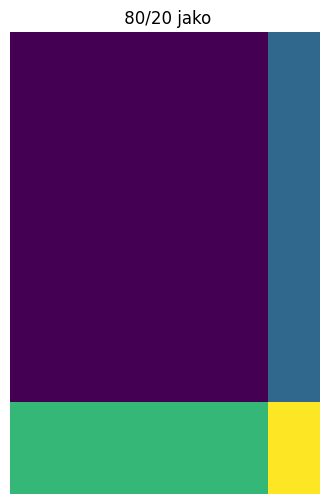

In [363]:
import numpy as np, matplotlib.pyplot as plt


grid = np.zeros((20,6))
grid[:16,:5]=1; grid[:16,5]=2; grid[16:,:5]=3; grid[16:,5]=4
plt.figure(figsize=(4,6))
plt.imshow(grid, aspect='auto')
plt.title(' 80/20 jako')
plt.axis('off')
plt.show()

### 1.3 Kaksi muuta tapaa käyttää kNN-algoritmia 




**Kielentunnistus**

Tätä voidaan käyttää esimerkiksi sähköpostin roskapostien tunnistamiseen. kNN voi etsiä viesteistä esimerkiksi tiettyjä sanoja kuten voitto, ilmainen jne. tai katsomalla onko viestissä esimerkiksi linkkejä.

**Asiakkaiden samankaltaisuuden tunnistaminen**

Tässä kNN voidaan hyödyntää esimerkiksi sisältösuositusten tekemiseksi. kNN voidaan käyttää esimerkiksi Spotifyn "Viikon suositukset" - listauksessa, Netflixin "Sinulle suositeltua" - listauksessa tai esimerkiksi sosiaalisen median algoritmissa. Ennustuksia voidaan tehdä vertailemalla käyttäjän pitämästä sisällöstä, hakusanojen perusteella tai esimerkiksi musiikin ja ohjelmien genren perusteella.



## Osa 2

### 2.1 Testejä eri $k$ :n arvoilla

    k  test_accuracy
0   1       0.606987
1   3       0.502183
2   5       0.515284
3   7       0.528384
4   9       0.537118
5  11       0.524017
6  15       0.550218


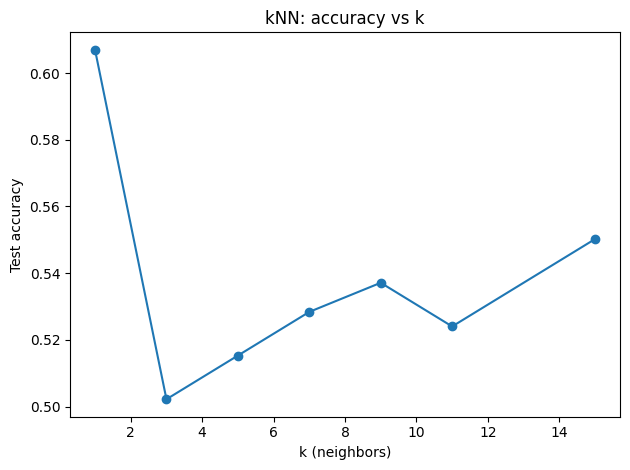

Paras k testissä: k=1, accuracy=0.6070


In [364]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#  k-arvojen testaus ja testitarkkuus
k_values = [1, 3, 5, 7, 9, 11, 15]
rows = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    rows.append([k, acc])

# Taulukko ja havainnollistaminen
df_k = pd.DataFrame(rows, columns=['k', 'test_accuracy']).sort_values('k')
print(df_k)

plt.figure()
plt.plot(df_k['k'], df_k['test_accuracy'], marker='o')
plt.xlabel('k (neighbors)')
plt.ylabel('Test accuracy')
plt.title('kNN: accuracy vs k')
plt.tight_layout()
plt.show()

# Tulostus parhaasta k -arvosta
best_idx = df_k['test_accuracy'].idxmax()
best_k = int(df_k.loc[best_idx, 'k'])
best_acc = float(df_k.loc[best_idx, 'test_accuracy'])
print(f"Paras k testissä: k={best_k}, accuracy={best_acc:.4f}")


### 2.2 Eri train/ splits testien tekeminen

**Eri testien vertailu arvolla k=5.**

In [365]:
rows = []

#Verrataan 20%, 30% ja 40% 
for s in [0.2, 0.3, 0.4]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=s, random_state=42)
    m = KNeighborsClassifier(n_neighbors=5)
    m.fit(X_tr, y_tr)
    pred = m.predict(X_te)
    rows.append([s, accuracy_score(y_te, pred)])

df_splits = pd.DataFrame(rows, columns=['testin_koko','testin_paikkaansapitävyys'])
df_splits.sort_values('testin_koko')

,testin_koko,testin_paikkaansapitävyys
0,0.2,0.515284
1,0.3,0.495627
2,0.4,0.482533


### 2.3 $k$-fold validation

In [366]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n_splits= 6
k=5
kf= KFold(n_splits= n_splits, shuffle=True)
summa=0

for train_idx, test_idx in kf.split(X):
    x_train = X.iloc[train_idx, :] 
    x_test = X.iloc[test_idx, :]
    
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    knn=KNeighborsClassifier(k)
    knn.fit(x_train, y_train)

    y_pred_test = knn.predict(x_test)

    summa += accuracy_score(y_pred_test, y_test)

cv_mean = summa / n_splits
print("Keskitarkkuus:", cv_mean)

Keskitarkkuus: 0.4890144208689262


**Testit eri k -arvoilla**

In [367]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k_values = [1,3,5,7,9,11,15]
rows = []
for k in k_values:
    m = KNeighborsClassifier(n_neighbors=k)
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    rows.append([k, accuracy_score(y_test, pred)])

df_k = pd.DataFrame(rows, columns=['k','testin_paikkaansapitävyys'])
df_k.sort_values('k')

,k,testin_paikkaansapitävyys
0,1,0.606987
1,3,0.502183
2,5,0.515284
3,7,0.528384
4,9,0.537118
5,11,0.524017
6,15,0.550218


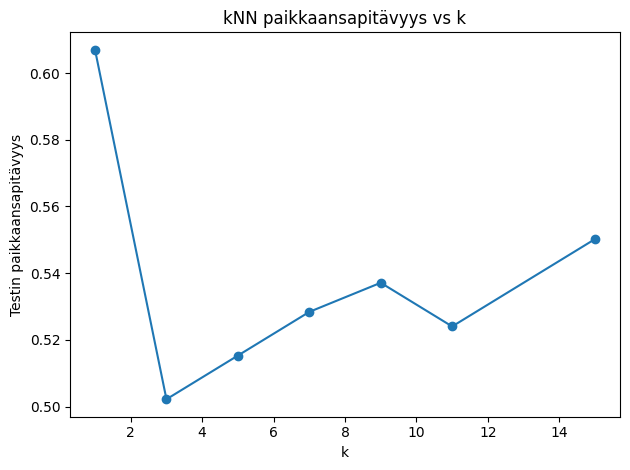

In [368]:

plt.figure()
plt.plot(df_k['k'], df_k['testin_paikkaansapitävyys'], marker='o')
plt.xlabel('k')
plt.ylabel('Testin paikkaansapitävyys')
plt.title('kNN paikkaansapitävyys vs k')
plt.tight_layout()
plt.show()

**5-fold ristiin vertailu**

In [369]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for tr, te in kf.split(X):
    X_train, X_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]
    m = KNeighborsClassifier(n_neighbors=5)
    m.fit(X_train, y_train)
    preds = m.predict(X_test)
    scores.append(accuracy_score(y_test, preds))

cv_mean = sum(scores)/len(scores)
print('5-fold ristiinvertailun keskiarvon paikkaansapitävyys:', cv_mean)

5-fold ristiinvertailun keskiarvon paikkaansapitävyys: 0.47769861334559105
